In [1]:
import jao as jao
from datetime import datetime
from pytz import timezone
import pandas as pd

In [2]:
client = jao.JaoPublicationToolPandasClient()

In [43]:
date_str = "2023-03-03"
date_to = pd.Timestamp(date_str, tz = timezone("Europe/Paris"))
date_str = "2023-03-02"
date_from = pd.Timestamp(date_str, tz = timezone("Europe/Paris"))

In [3]:
date_str = "2023-01-01"
date_obj = datetime.strptime(date_str, "%Y-%m-%d")
df_maxbex = client.query_maxbex(day = date_obj)

In [53]:
date_str = "2023-03-01"
mtu = pd.Timestamp(date_str, tz = timezone("Europe/Paris"))
df_final_domain = client.query_final_domain(mtu = mtu, presolved=True)

In [54]:
df_final_domain["contingency_hub_from"].unique()

array(['AT', 'HU', 'SI', 'DE', 'BE', 'NA', 'CZ', 'HR', 'SK', 'NL', 'PL',
       'RO', None], dtype=object)

In [66]:
df_final_domain.sort_values("ptdf_ALDE", ascending=False)[["hub_from","direction", "hub_to","ptdf_ALDE"]].iloc[0:20]

,hub_from,direction,hub_to,ptdf_ALDE
104,NA,NA,NA,1.00000
102,NA,NA,NA,1.00000
99,NA,NA,NA,1.00000
86,SK,DIRECT,UA,0.20758
68,NL,OPPOSITE,DE,0.17586
69,NL,OPPOSITE,DE,0.17399
67,NL,OPPOSITE,DE,0.17213
66,NL,OPPOSITE,DE,0.17200
60,SK,DIRECT,HU,0.16834
47,NL,OPPOSITE,DE,0.16652


In [28]:
df_final_domain.loc[107:,["ram",'ptdf_ALBE',
       'ptdf_ALDE', 'ptdf_AT', 'ptdf_BE', 'ptdf_CZ', 'ptdf_DE', 'ptdf_FR',
       'ptdf_HR', 'ptdf_HU', 'ptdf_NL', 'ptdf_PL', 'ptdf_RO', 'ptdf_SI',
       'ptdf_SK']]

,ram,ptdf_ALBE,ptdf_ALDE,ptdf_AT,ptdf_BE,ptdf_CZ,ptdf_DE,ptdf_FR,ptdf_HR,ptdf_HU,ptdf_NL,ptdf_PL,ptdf_RO,ptdf_SI,ptdf_SK
107,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,1000.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,1000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,1000.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [63]:
df_final_domain["flow"] = ""
for i in range(len(df_final_domain["flow"])):
    df_final_domain.loc[i,"flow"] =  f"""{df_final_domain.loc[i,"hub_from"] if df_final_domain.loc[i,"direction"] == "DIRECT" else df_final_domain.loc[i,"hub_to"]}->{df_final_domain.loc[i,"hub_to"] if df_final_domain.loc[i,"direction"] == "DIRECT" else df_final_domain.loc[i,"hub_from"]}"""

<Axes: >

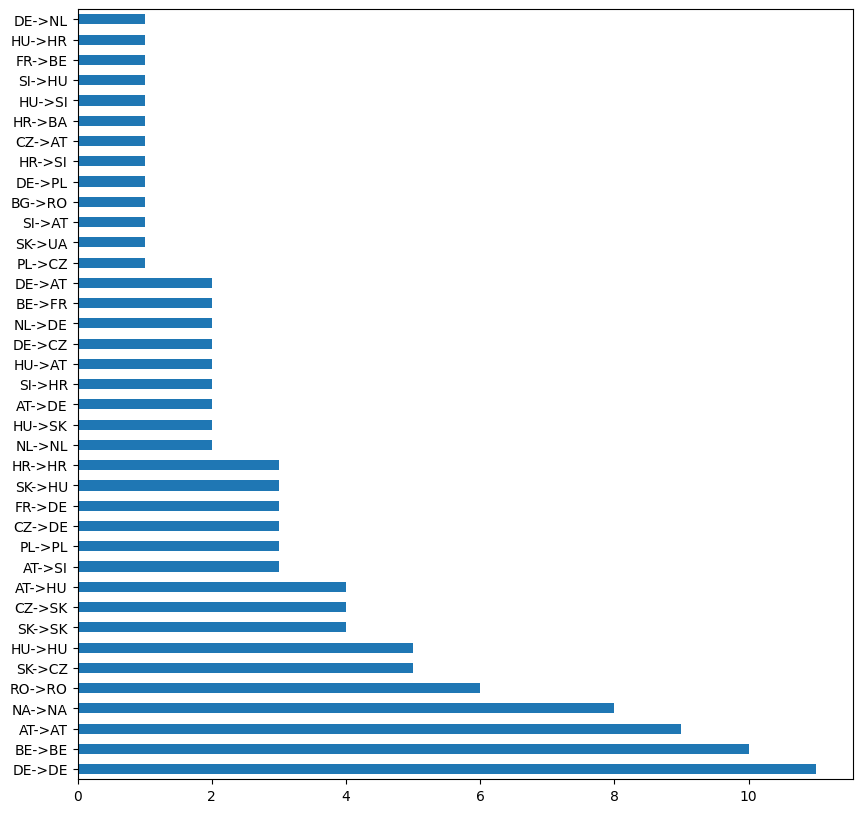

In [72]:
df_final_domain["flow"].value_counts().plot(kind="barh", figsize=(10,10))

In [30]:
df_final_domain.iloc[112]

id_original                                             166214742
mtu                                     2023-01-01 00:00:00+01:00
tso                                                            NA
cne_name                       Equality Constraint BE_AL-DE_AL 02
cne_eic                                                        NA
direction                                                      NA
hub_from                                                       NA
hub_to                                                         NA
substation_from                                                NA
substation_to                                                  NA
element_type                                                 None
fmax_type                                                    None
cont_tso                                                     None
cont_name                                                    None
contingency_branch_name                                      None
contingenc